In [1]:
from matplotlib import rc
%matplotlib notebook
from lmfit import Model



rc('text', usetex=False)
rc("font", family="serif")
import numpy as np #notwendige Pakete laden
import matplotlib.pyplot as plt
import matplotlib
import math
import matplotlib.ticker as ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator, NullLocator)
import pandas as pd
from PIL import Image


In [2]:
matplotlib.use("pgf")
plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False,
    "figure.figsize": (6.48, 2.75),
    "pgf.texsystem": "pdflatex",
    "font.size": 13,
    "text.latex.preamble" :  r"\usepackage{amsmath} \usepackage[utf8]{inputenc} \usepackage[T1]{fontenc}\usepackage[output-decimal-marker={,}]{siunitx} \sisetup{per-mode=fraction, separate-uncertainty = true, locale = DE} \usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}",
    "pgf.preamble": r"\usepackage{amsmath} \usepackage[utf8]{inputenc} \usepackage[T1]{fontenc}\usepackage[output-decimal-marker={,}]{siunitx} \sisetup{per-mode=fraction, separate-uncertainty = true, locale = DE} \usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}",
    #r"\usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}"])
})

In [3]:
import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % ('\\mathdefault{%s}' % self.format)
    

In [10]:
ev_unique, flux_unique = np.loadtxt('unique_values.csv', unpack=True)

In [11]:
args = np.argwhere(ev_unique > 600)
ev_unique = ev_unique[args]
flux_unique = flux_unique[args]

Text(1199.79, 86000000000.0, 'Gd M5')

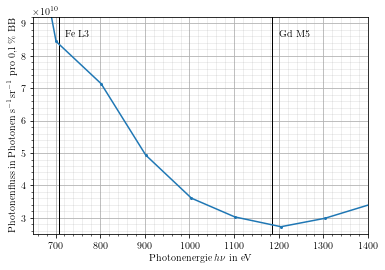

In [15]:
%matplotlib inline 
#grob
fig, axs = plt.figure(), plt.gca()
#fig.suptitle('MOENCH detector characteristics')
axes = axs
#axes.set_xlim(left=800, right=1200)
#axes.set_title('Soft X-Ray Range')
axes.set_xlim((650,1400))
axes.set_ylim(bottom=2.5e10, top=9.2e10)

axes.set_xlabel(r'Photonenergie $h\nu$ in eV')
#axes.set_xscale('log')
axes.set_ylabel(r"Photonenfluss in Photonen s$^{-1}$sr$^{-1}$ pro \SI{0,1}{\percent} BB")
axes.grid(which='major')
axes.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
#axes.xaxis.set_major_formatter(OOMFormatter(order = 10, fformat = "%1.0f"))
axes.yaxis.set_major_formatter(OOMFormatter(order = 10, fformat = "%1.0f"))
axes.xaxis.set_major_locator(MultipleLocator(100))
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_major_locator(MultipleLocator(1e10))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
axes.errorbar(ev_unique, flux_unique, fmt="-o", ms=2)
axes.axvline(x=706.97, linestyle="-", color='black', linewidth=1, alpha=1)
axes.text(x=706.97+15, y=8.6e10, s=r'Fe L3')
axes.axvline(x=1184.79, linestyle="-",color='black', linewidth=1, alpha=1)
axes.text(x=1184.79+15, y=8.6e10, s=r'Gd M5')

In [13]:
fig.savefig('xps_spectrum_700_1400.pgf', bbox_inches='tight', pad_inches=0.0)